<a href="https://colab.research.google.com/github/suparuek2405/Stock-screening-with-python/blob/main/Group_assignment_Tacocat_set_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install libraries
# !pip install pandas
# !pip install numpy
# !pip install yfinance

In [1]:
#import library
import yfinance as yf
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300  # Set the default DPI to 300
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning, message="Converting to PeriodArray/Index representation will drop timezone information.")

### This part is for retrive data, skip if already got data.

In [5]:
#Function for get data from yfinance
def rename_columns_to_year_end(df):
    df_rt = df.copy()
    years = df_rt.columns.year
    year_end_dates = [pd.Timestamp(f"{year}-12-31") for year in years]
    df_rt.columns = year_end_dates
    return df_rt

def get_balance_sheet(ticker):
  balance_sheet_df = pd.DataFrame()
  n = len(ticker)
  print("start getting balance sheet")
  for c,i in enumerate(ticker):
    #retrive data from yfinance
    stock = yf.Ticker(i)
    raw = stock.balancesheet

    #rename column
    bs = rename_columns_to_year_end(raw)

      #reset index and rename it
    bs.reset_index(inplace=True)
    bs.rename(columns={'index': 'data'}, inplace=True)
    bs['symbol'] = i.split('.')[0]

    # Check for duplicates in the 'data' column and drop them
    bs = bs[~bs.duplicated(subset=['data'])]
    bs.set_index(['symbol', 'data'], inplace=True)

    #change type data of column for better look
    bs.columns = pd.to_datetime(bs.columns)

    #append to dataframe
    balance_sheet_df = pd.concat([balance_sheet_df, bs])
    print(f"{c+1}/{n} {i}")
  print("finish getting balance sheet")
  return balance_sheet_df

def get_income_statement(ticker):
  income_statement_df = pd.DataFrame()
  n = len(ticker)
  print("start getting income statement")
  for c,i in enumerate(ticker):
    #retrive data from yfinance
    stock = yf.Ticker(i)
    raw = stock.financials

    #rename column
    is_df = rename_columns_to_year_end(raw)

    #reset index and rename it
    is_df.reset_index(inplace=True)
    is_df.rename(columns={'index': 'data'}, inplace=True)
    is_df['symbol'] = i.split('.')[0]

    # Check for duplicates in the 'data' column and drop them
    is_df = is_df[~is_df.duplicated(subset=['data'])]
    is_df.set_index(['symbol', 'data'], inplace=True)

    #change type data of column for better look
    is_df.columns = pd.to_datetime(is_df.columns)

    #append to dataframe
    income_statement_df = pd.concat([income_statement_df, is_df])
    print(f"{c+1}/{n} {i}")
  print("finish getting income statement")
  return income_statement_df

def get_cashflow_statement(ticker):
  cashflow_statement_df = pd.DataFrame()
  n = len(ticker)
  print("start getting cashflow statement")
  for c,i in enumerate(ticker):
    #retrive data from yfinance
    stock = yf.Ticker(i)
    raw = stock.cashflow

    #rename column
    cf_df = rename_columns_to_year_end(raw)

    #reset index and rename it
    cf_df.reset_index(inplace=True)
    cf_df.rename(columns={'index': 'data'}, inplace=True)
    cf_df['symbol'] = i.split('.')[0]

    # Check for duplicates in the 'data' column and drop them
    cf_df = cf_df[~cf_df.duplicated(subset=['data'])]
    cf_df.set_index(['symbol', 'data'], inplace=True)

    #change type data of column for better look
    cf_df.columns = pd.to_datetime(cf_df.columns)

    #append to dataframe
    cashflow_statement_df = pd.concat([cashflow_statement_df, cf_df])
    print(f"{c+1}/{n} {i}")
  print("finish getting cashflow statement")
  return cashflow_statement_df

def get_monthly_stock_prices(ticker,start_date = "2022-01-01", end_date="2024-09-30"):
  stock = yf.Ticker(ticker)
  data = stock.history(start=start_date, end=end_date, interval="1mo")
  data = data.set_index(pd.to_datetime(data.index))

  # Resample to the start of each month
  monthly_prices = data['Close'].resample('MS').first()
  monthly_prices = pd.DataFrame(monthly_prices)
  monthly_prices['symbol'] = ticker.split('.')[0]
  monthly_prices.index = monthly_prices.index.to_period('M').to_timestamp(how='start')
  return monthly_prices

def get_dividend_data(ticker, start_date="2022-01-01", end_date="2024-09-30"):
  stock = yf.Ticker(ticker)
  dividends = stock.dividends
  # Filter dividends based on the specified date range
  dividends = dividends[(dividends.index >= start_date) & (dividends.index <= end_date)]
  if not dividends.empty:
    dividends_df = pd.DataFrame(dividends)
    dividends_df['symbol'] = ticker.split('.')[0]
    dividends_df = dividends_df.rename(columns={'Dividends':'amount'})
    dividends_df.index = dividends_df.index.to_period('M').to_timestamp(how='start')
    return dividends_df

def get_financial_data(ticker):
  balance_sheet = get_balance_sheet(ticker)
  income_statement = get_income_statement(ticker)
  cashflow_statement = get_cashflow_statement(ticker)
  return balance_sheet, income_statement, cashflow_statement

In [4]:
#df = pd.read_csv('/content/drive/My Drive/Tools/Group Assignment/set_scraped.csv')
df = pd.read_csv('https://raw.githubusercontent.com/suparuek2405/Stock-screening-with-python/main/set_scraped.csv')

In [353]:
bkk = df.copy()
bkk = bkk[['symbol', 'text-start', 'text-start 2', 'symbol 2', 'symbol 3']]
bkk.columns = ['symbol', 'company_name', 'market', 'industry', 'sector']
bkk['ticker'] = bkk['symbol'] + '.BK'

In [22]:
set_list = bkk['ticker']
ticker_error = ['DIMET.BK'] #exclude error ticker
set_list = set_list[set_list.isin(ticker_error) == False]

In [ ]:
#run this code to start retrive data from yfinance
bl_st, ic_st, cf_st = get_financial_data(set_list)

In [24]:
# run this code below to download file
# bl_st.to_csv('balance_sheet.csv')
# ic_st.to_csv('income_statement.csv')
# cf_st.to_csv('cashflow_statement.csv')

# from google.colab import files
# files.download('balance_sheet.csv')
# files.download('income_statement.csv')
# files.download('cashflow_statement.csv')

------

### After get data


In [3]:
#do not change variable name due to function using these as global variable
df = pd.read_csv('https://raw.githubusercontent.com/suparuek2405/Stock-screening-with-python/main/set_scraped.csv')
bkk = df.copy()
bkk = bkk[['symbol', 'text-start', 'text-start 2', 'symbol 2', 'symbol 3']]
bkk.columns = ['symbol', 'company_name', 'market', 'industry', 'sector']
bkk['ticker'] = bkk['symbol'] + '.BK'
bl = pd.read_csv('https://raw.githubusercontent.com/suparuek2405/Stock-screening-with-python/refs/heads/main/balance_sheet.csv')
ic = pd.read_csv('https://raw.githubusercontent.com/suparuek2405/Stock-screening-with-python/refs/heads/main/income_statement.csv')
cf = pd.read_csv('https://raw.githubusercontent.com/suparuek2405/Stock-screening-with-python/refs/heads/main/cashflow_statement.csv')

### Function for Growth investment style

In [7]:
def get_lastdateofyear(start_year, end_year):
    last_dates = []

    for year in range(start_year, end_year + 1):
        last_date = datetime(year, 12, 31).strftime('%Y-%m-%d')
        last_dates.append(last_date)

    return last_dates

def get_roe(startyear=2020, endyear=2022):
  #get lastdate of year to retrive
  col = get_lastdateofyear(startyear, endyear)

  #create copy of data to calculate
  net_income = ic[ic.data == 'Net Income'][['symbol', 'data'] + col].copy()
  stockholder_equity = bl[bl.data == 'Stockholders Equity'][['symbol', 'data'] + col].copy()

  #merge table
  df_merge = pd.merge(net_income, stockholder_equity, on='symbol', suffixes=('_ni', '_se'))

  # Calculate ROE: Net Income / Average Stockholders' Equity
  roe_dict = {}
  for year in col:
      # Calculate ROE: Net Income / Stockholders' Equity
      df_merge[f'{year}'] = df_merge[f'{year}_ni'] / df_merge[f'{year}_se']

      # Store the ROE results for the year in the dictionary
      roe_dict[f'{year}'] = df_merge[[f'{year}']]

  #prep return dataframe
  df = df_merge[['symbol'] + [f'{year}' for year in col]].copy()
  df['ratio'] = "ROE"

  return df[['symbol', 'ratio'] + col]

def get_revenue_growth_yoy(startyear=2020, endyear=2022):
  col = get_lastdateofyear(startyear, endyear)
  revenue = ic[ic.data == 'Total Revenue'][['symbol', 'data'] + col].copy()

  revenue_growth_dict = {}
  for i in range(len(col) - 1):
    current_year = col[i + 1]
    previous_year = col[i]
    revenue[f'{current_year}_growth'] = (revenue[current_year] - revenue[previous_year]) / revenue[previous_year]

    # Store the revenue growth results for the year in the dictionary
    revenue_growth_dict[f'{current_year}_growth'] = revenue[[f'{current_year}_growth']]

  # Prepare the return DataFrame
  df = revenue[['symbol'] + [f'{year}_growth' for year in col[1:]]].copy()
  df['ratio'] = 'Revenue Growth YOY'

  # Rename columns by removing the '_growth' suffix
  df.rename(columns={f'{year}_growth': f'{year}' for year in col[1:]}, inplace=True)

  return df[['symbol', 'ratio'] + [f'{year}' for year in col[1:]]]

def get_net_profit_margin(startyear=2020, endyear=2022):
  #get lastdate of year to retrive
  col = get_lastdateofyear(startyear, endyear)

  #create copy of data to calculate
  net_income = ic[ic.data == 'Net Income'][['symbol', 'data'] + col].copy()
  total_revenue = ic[ic.data == 'Total Revenue'][['symbol', 'data'] + col].copy()

  #merge table
  df_merge = pd.merge(net_income, total_revenue, on='symbol', suffixes=('_ni', '_tr'))

  # Calculate Net Profit Margin: Net Income / Total Revenue
  npm_dict = {}
  for year in col:
      # Calculate Net Profit Margin: Net Income / Total Revenue
      df_merge[f'{year}'] = df_merge[f'{year}_ni'] / df_merge[f'{year}_tr']

      # Store the Net Profit Margin results for the year in the dictionary
      npm_dict[f'{year}'] = df_merge[[f'{year}']]

  #prep return dataframe
  df = df_merge[['symbol'] + [f'{year}' for year in col]].copy()
  df['ratio'] = "Net Profit Margin"

  return df[['symbol', 'ratio'] + col]

def get_roa(startyear=2020, endyear=2022):
  # Get the last date of each year
  col = get_lastdateofyear(startyear, endyear)

  # Create copies of the dataframes for calculation
  net_income = ic[ic.data == 'Net Income'][['symbol', 'data'] + col].copy()
  total_assets = bl[bl.data == 'Total Assets'][['symbol', 'data'] + col].copy()

  # Merge the two dataframes on the 'symbol' column
  df_merge = pd.merge(net_income, total_assets, on='symbol', suffixes=('_ni', '_ta'))

  # Calculate ROA for each year and store the results in a dictionary
  roa_dict = {}
  for year in col:
    # Calculate ROA: Net Income / Total Assets
    df_merge[f'{year}'] = df_merge[f'{year}_ni'] / df_merge[f'{year}_ta']

    # Store the ROA results for the year in the dictionary
    roa_dict[f'{year}'] = df_merge[[f'{year}']]

  # Prepare the return dataframe
  df = df_merge[['symbol'] + [f'{year}' for year in col]].copy()
  df['ratio'] = "ROA"

  return df[['symbol', 'ratio'] + col]

def get_operating_cashflow_growth(startyear=2020, endyear=2022):
  col = get_lastdateofyear(startyear, endyear)
  operating_cashflow = cf[cf.data == 'Operating Cash Flow'][['symbol', 'data'] + col].copy()

  ocf_growth_dict = {}
  for i in range(len(col) - 1):
    current_year = col[i + 1]
    previous_year = col[i]
    operating_cashflow[f'{current_year}_growth'] = (operating_cashflow[current_year] - operating_cashflow[previous_year]) / operating_cashflow[previous_year]

    # Store the operating cash flow growth results for the year in the dictionary
    ocf_growth_dict[f'{current_year}_growth'] = operating_cashflow[[f'{current_year}_growth']]

  # Prepare the return DataFrame
  df = operating_cashflow[['symbol'] + [f'{year}_growth' for year in col[1:]]].copy()
  df['ratio'] = 'Operating Cash Flow Growth YOY'

  # Rename columns by removing the '_growth' suffix
  df.rename(columns={f'{year}_growth': f'{year}' for year in col[1:]}, inplace=True)

  return df[['symbol', 'ratio'] + [f'{year}' for year in col[1:]]]

def get_de(startyear=2020, endyear=2022):
  # Get the last date of each year
  col = get_lastdateofyear(startyear, endyear)

  # Create copies of the dataframes for calculation
  total_debt = bl[bl.data == 'Total Debt'][['symbol', 'data'] + col].copy()
  stockholder_equity = bl[bl.data == 'Stockholders Equity'][['symbol', 'data'] + col].copy()

  # Merge the two dataframes on the 'symbol' column
  df_merge = pd.merge(total_debt, stockholder_equity, on='symbol', suffixes=('_td', '_se'))

  # Calculate D/E Ratio for each year and store the results in a dictionary
  de_dict = {}
  for year in col:
    # Calculate D/E Ratio: Total Debt / Stockholders' Equity
    df_merge[f'{year}'] = df_merge[f'{year}_td'] / df_merge[f'{year}_se']

    # Store the D/E Ratio results for the year in the dictionary
    de_dict[f'{year}'] = df_merge[[f'{year}']]

  # Prepare the return dataframe
  df = df_merge[['symbol'] + [f'{year}' for year in col]].copy()
  df['ratio'] = "D/E Ratio"

  return df[['symbol', 'ratio'] + col]

### First plot - Financial Ratios screening for Growth Investment #1

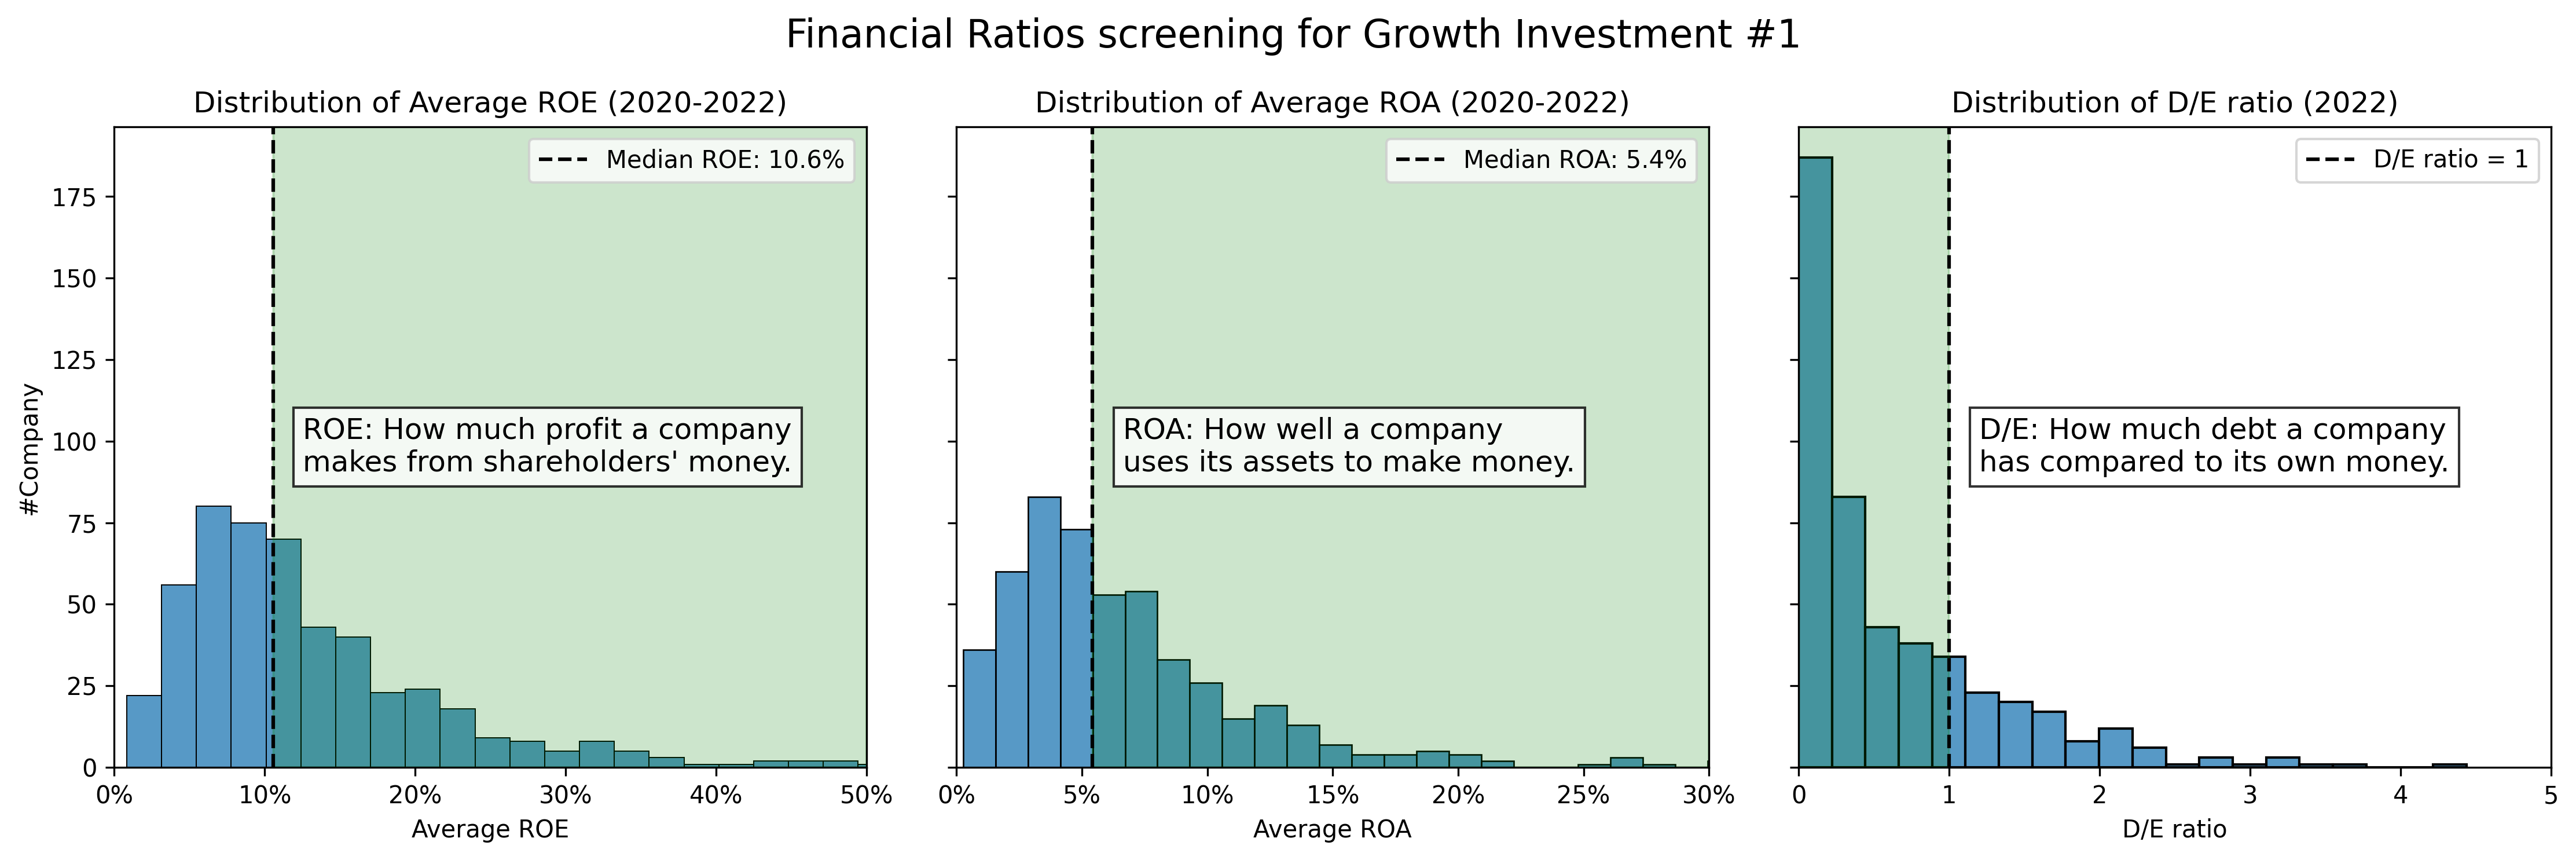

''

In [8]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

# Condition for ROE
roe = get_roe(2020,2022) #using data from 2022 to 2024
roe.dropna(inplace=True) #drop na values
roe = roe[(roe[['2020-12-31', '2021-12-31', '2022-12-31']] > 0).all(axis=1)] #all value must greater than 0
roe['avg_roe_3year'] = roe[['2020-12-31', '2021-12-31', '2022-12-31']].mean(axis=1) #get average ROE of 3 years

# Plot ROE distribution on the first subplot
sns.histplot(x='avg_roe_3year', data=roe, ax=axes[0])
median_roe = roe['avg_roe_3year'].median()
axes[0].axvline(median_roe, color='black', linestyle='--', label=f'Median ROE: {median_roe*100:.1f}%')
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[0].set_title('Distribution of Average ROE (2020-2022)')
axes[0].set_xlabel('Average ROE')
axes[0].set_ylabel('#Company')
axes[0].set_xlim(0, 0.5)
axes[0].legend()

# Condition for ROA
roa = get_roa(2020,2022) #using data from 2020 to 2022
roa.dropna(inplace=True) #drop na values
roa = roa[(roa[['2020-12-31', '2021-12-31', '2022-12-31']] > 0).all(axis=1)] #all value must greater than 0
roa['avg_roa_3year'] = roa[['2020-12-31', '2021-12-31', '2022-12-31']].mean(axis=1) #get average 3 year
roa = roa[roa['symbol'].isin(set(roe['symbol']))] #filter only symbol contains in roe table

# Plot ROA distribution on the second subplot
sns.histplot(x='avg_roa_3year', data=roa, ax=axes[1])
median_roa = roa['avg_roa_3year'].median()
axes[1].axvline(median_roa, color='black', linestyle='--', label=f'Median ROA: {median_roa*100:.1f}%')
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[1].set_title('Distribution of Average ROA (2020-2022)')
axes[1].set_xlabel('Average ROA')
axes[1].set_ylabel('#Company')
axes[1].set_xlim(0, 0.3)
axes[1].legend()

# Condition for DE
de = get_de(2022) #using data only 2022
de.dropna(inplace=True) #drop na values
de = de[(de[['2022-12-31']] <= 5).all(axis=1) & (de[['2022-12-31']] > 0).all(axis=1)] #filter outlier
de = de[de['symbol'].isin(set(roa['symbol']))] #filter only symbol contains in roa table

# Plot D/E ratio distribution on the third subplot
sns.histplot(x='2022-12-31', data=de, ax=axes[2])
de_line = 1
axes[2].axvline(de_line, color='black', linestyle='--', label=f'D/E ratio = 1')
axes[2].set_title('Distribution of D/E ratio (2022)')
axes[2].set_xlabel('D/E ratio')
axes[2].set_ylabel('#Company')
axes[2].set_xlim(0, 5)
axes[2].legend()

#add highlight and textbox
y_min, y_max = axes[0].get_ylim()

axes[0].set_ylim(0, y_max)
axes[0].fill_betweenx(y=[y_min, y_max], x1=median_roe, x2=axes[0].get_xlim()[1], color='green', alpha=0.2)
axes[0].text(median_roe + (axes[0].get_xlim()[1] - median_roe) * 0.05, (y_min+y_max)/2,
             'ROE: How much profit a company\nmakes from shareholders\' money.',
             color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8),
             ha='left', va='center')

axes[1].set_ylim(0, y_max)
axes[1].fill_betweenx(y=[y_min, y_max], x1=median_roa, x2=axes[1].get_xlim()[1], color='green', alpha=0.2)
axes[1].text(median_roa + (axes[1].get_xlim()[1] - median_roa) * 0.05, (y_min+y_max)/2,
             'ROA: How well a company\nuses its assets to make money.',
             color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8),
             ha='left', va='center')

axes[2].set_ylim(0, y_max)
axes[2].fill_betweenx(y=[y_min, y_max], x1=axes[2].get_xlim()[0], x2=de_line, color='green', alpha=0.2)
axes[2].text(de_line + (axes[2].get_xlim()[1] - de_line) * 0.05, (y_min+y_max)/2,
             'D/E: How much debt a company\nhas compared to its own money.',
             color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8),
             ha='left', va='center')

# Adjust the layout and display the plot
plt.suptitle('Financial Ratios screening for Growth Investment #1', fontsize=16)
plt.tight_layout()
plt.show()
;

### Second plot - Financial Ratios screening for Growth Investment #2

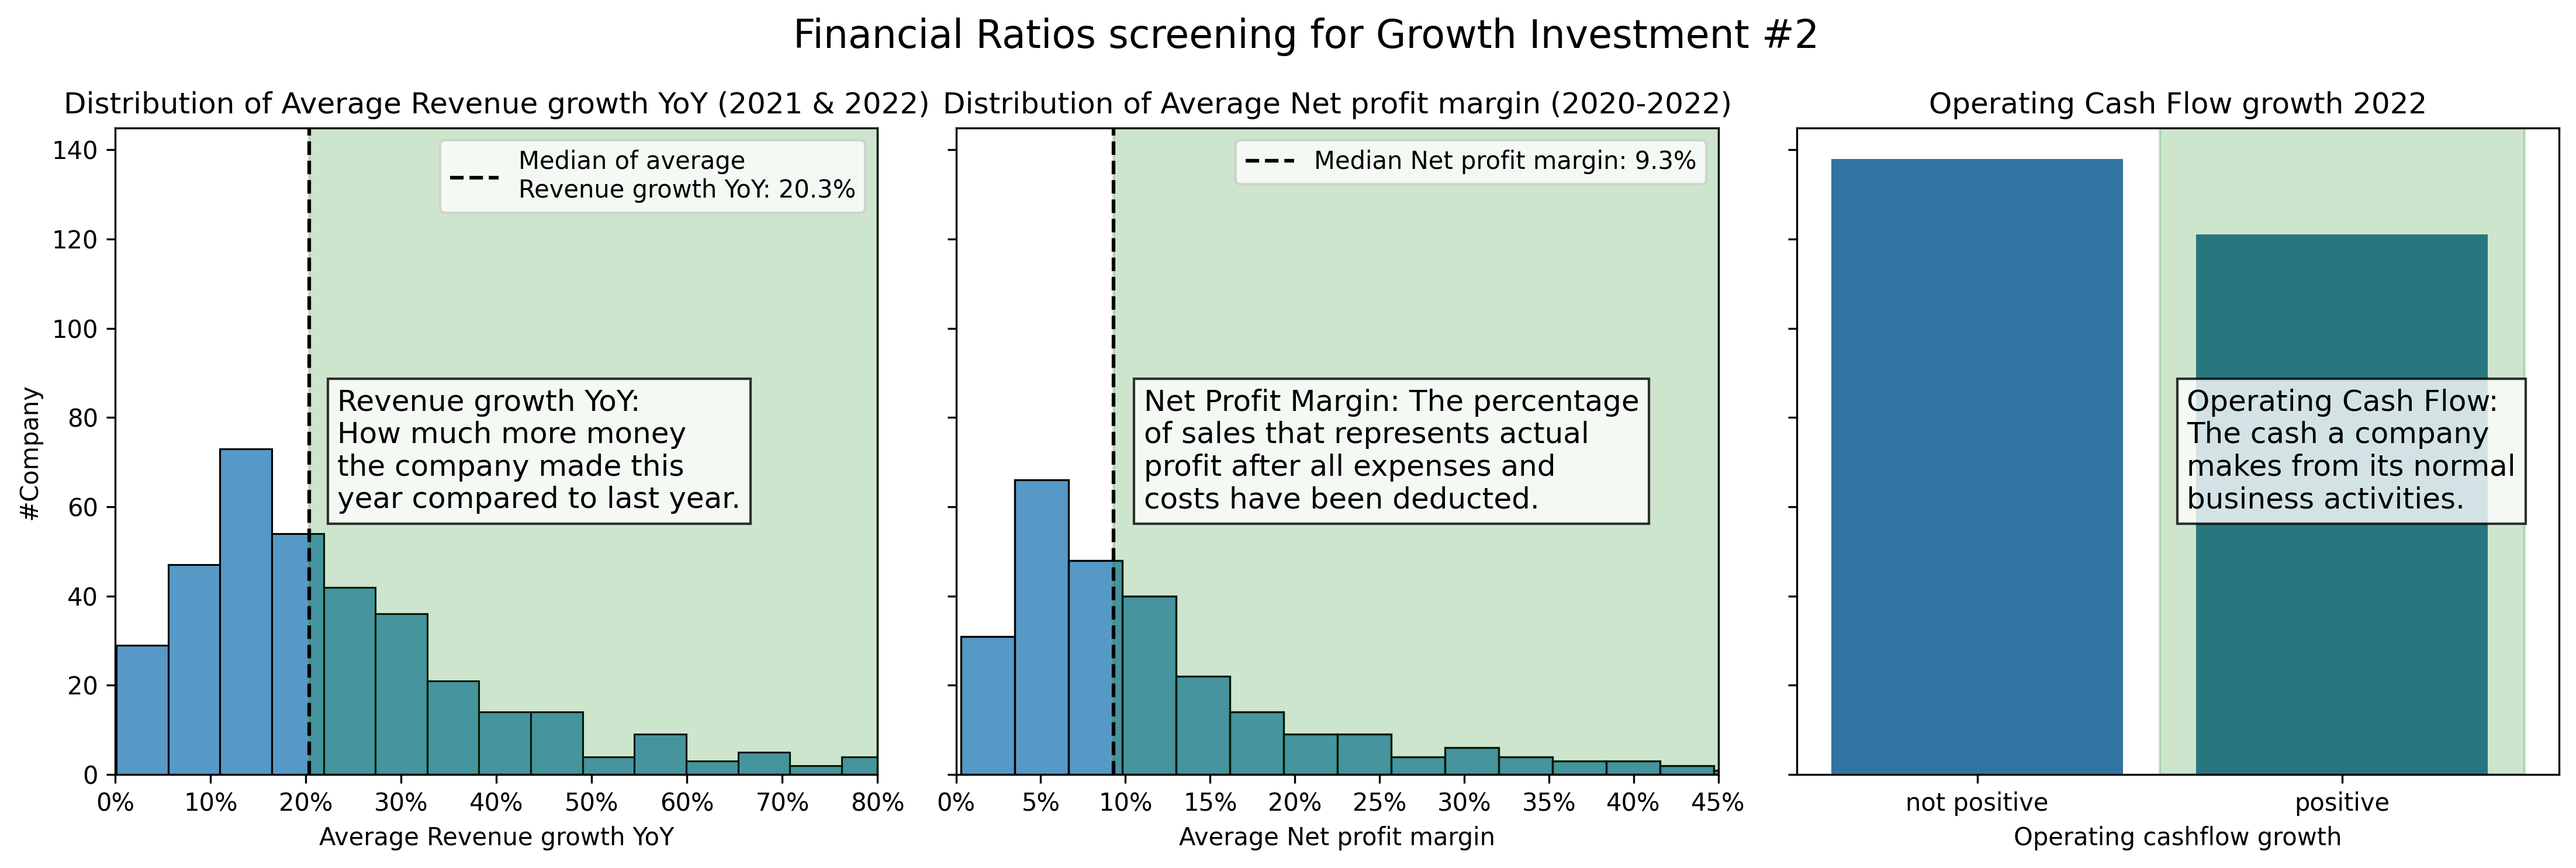

In [9]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

# Condition for revenue growth
rev_gth = get_revenue_growth_yoy(2020,2022)
rev_gth.dropna(inplace=True) #drop na values
rev_gth = rev_gth[(rev_gth[['2021-12-31', '2022-12-31']] > 0).all(axis=1) & (rev_gth[['2021-12-31', '2022-12-31']] < 2).all(axis=1)] #filter value more than 0 but less than 2
rev_gth['rev_gth_2year'] = rev_gth[['2021-12-31', '2022-12-31']].mean(axis=1) #get average 2 year

# Plot revenue growth distribution on the first subplot
sns.histplot(x='rev_gth_2year', data=rev_gth, ax=axes[0])
median_gth = rev_gth['rev_gth_2year'].median()
axes[0].axvline(median_gth, color='black', linestyle='--', label=f'Median of average\nRevenue growth YoY: {median_gth*100:.1f}%')
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[0].set_title('Distribution of Average Revenue growth YoY (2021 & 2022)')
axes[0].set_xlabel('Average Revenue growth YoY')
axes[0].set_ylabel('#Company')
axes[0].set_xlim(0, 0.8)
axes[0].legend()

# Condition for NPM
npm = get_net_profit_margin(2020,2022)
npm.dropna(inplace=True) #drop na values
npm = npm[(npm[['2020-12-31', '2021-12-31', '2022-12-31']] > 0).all(axis=1)] #all value must greater than 0
npm['avg_npm_3year'] = npm[['2020-12-31', '2021-12-31', '2022-12-31']].mean(axis=1) #get average 3 year
npm = npm[npm['symbol'].isin(set(rev_gth['symbol']))] #filter only symbol contains in rev_gth table

# Plot NPM distribution on the second subplot
sns.histplot(x='avg_npm_3year', data=npm, ax=axes[1])
median_npm = npm['avg_npm_3year'].median()
axes[1].axvline(median_npm, color='black', linestyle='--', label=f'Median Net profit margin: {median_npm*100:.1f}%')
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[1].set_title('Distribution of Average Net profit margin (2020-2022)')
axes[1].set_xlabel('Average Net profit margin')
axes[1].set_ylabel('#Company')
axes[1].set_xlim(0, 0.45)
axes[1].legend()

# Condition for operating cashflow
oper = get_operating_cashflow_growth(2020,2022)
oper.dropna(inplace=True) #drop na values
###oper['2 years consecutive growth'] = ((oper['2021-12-31'] > 0) & (oper['2022-12-31'] > 0)).apply(lambda x: 'positive' if x else 'not positive')
oper['2022 oper cashflow growth'] = ((oper['2022-12-31'] > 0)).apply(lambda x: 'positive' if x else 'not positive')
oper = oper[oper['symbol'].isin(set(npm['symbol']))] #filter only symbol contains in npm table

# Plot operating cashflow distribution on the third subplot
###sns.countplot(x='2 years consecutive growth', data=oper, ax=axes[2], order=['not positive', 'positive'])
sns.countplot(x='2022 oper cashflow growth', data=oper, ax=axes[2], order=['not positive', 'positive'])
axes[2].set_title('Distribution of Operating Cash Flow Growth')
axes[2].set_xlabel('Operating cashflow growth')
axes[2].set_ylabel('#Company')
###axes[2].set_title('Operating Cash Flow Growth (2021 & 2022)')
axes[2].set_title('Operating Cash Flow growth 2022')

#add highlight and textbox
y_min, y_max = axes[0].get_ylim()

axes[0].set_ylim(0, y_max)
axes[0].fill_betweenx(y=[y_min, y_max], x1=median_gth, x2=axes[0].get_xlim()[1], color='green', alpha=0.2)
axes[0].text(median_gth + (axes[0].get_xlim()[1] - median_gth) * 0.05, (y_min+y_max)/2,
             'Revenue growth YoY:\nHow much more money\nthe company made this\nyear compared to last year.',
             color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8),
             ha='left', va='center')

axes[1].set_ylim(0, y_max)
axes[1].fill_betweenx(y=[y_min, y_max], x1=median_npm, x2=axes[1].get_xlim()[1], color='green', alpha=0.2)
axes[1].text(median_npm + (axes[1].get_xlim()[1] - median_npm) * 0.05, (y_min+y_max)/2,
             'Net Profit Margin: The percentage\nof sales that represents actual \nprofit after all expenses and\ncosts have been deducted.',
             color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8),
             ha='left', va='center')

# Highlight the area for the positive category
x_pos = axes[2].get_xticks()
axes[2].axvspan(x_pos[1] - 0.5, x_pos[1] + 0.5, color='green', alpha=0.2)
axes[2].text(0.5 + (axes[2].get_xlim()[1] - median_npm) * 0.05, (y_min+y_max)/2,
             'Operating Cash Flow:\nThe cash a company\nmakes from its normal\nbusiness activities.',
             color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8),
             ha='left', va='center')

# Adjust the layout and display the plot
plt.suptitle('Financial Ratios screening for Growth Investment #2', fontsize=16)
plt.tight_layout()
plt.show()

### Third plot - Financial Ratios screening for Growth Investment #3

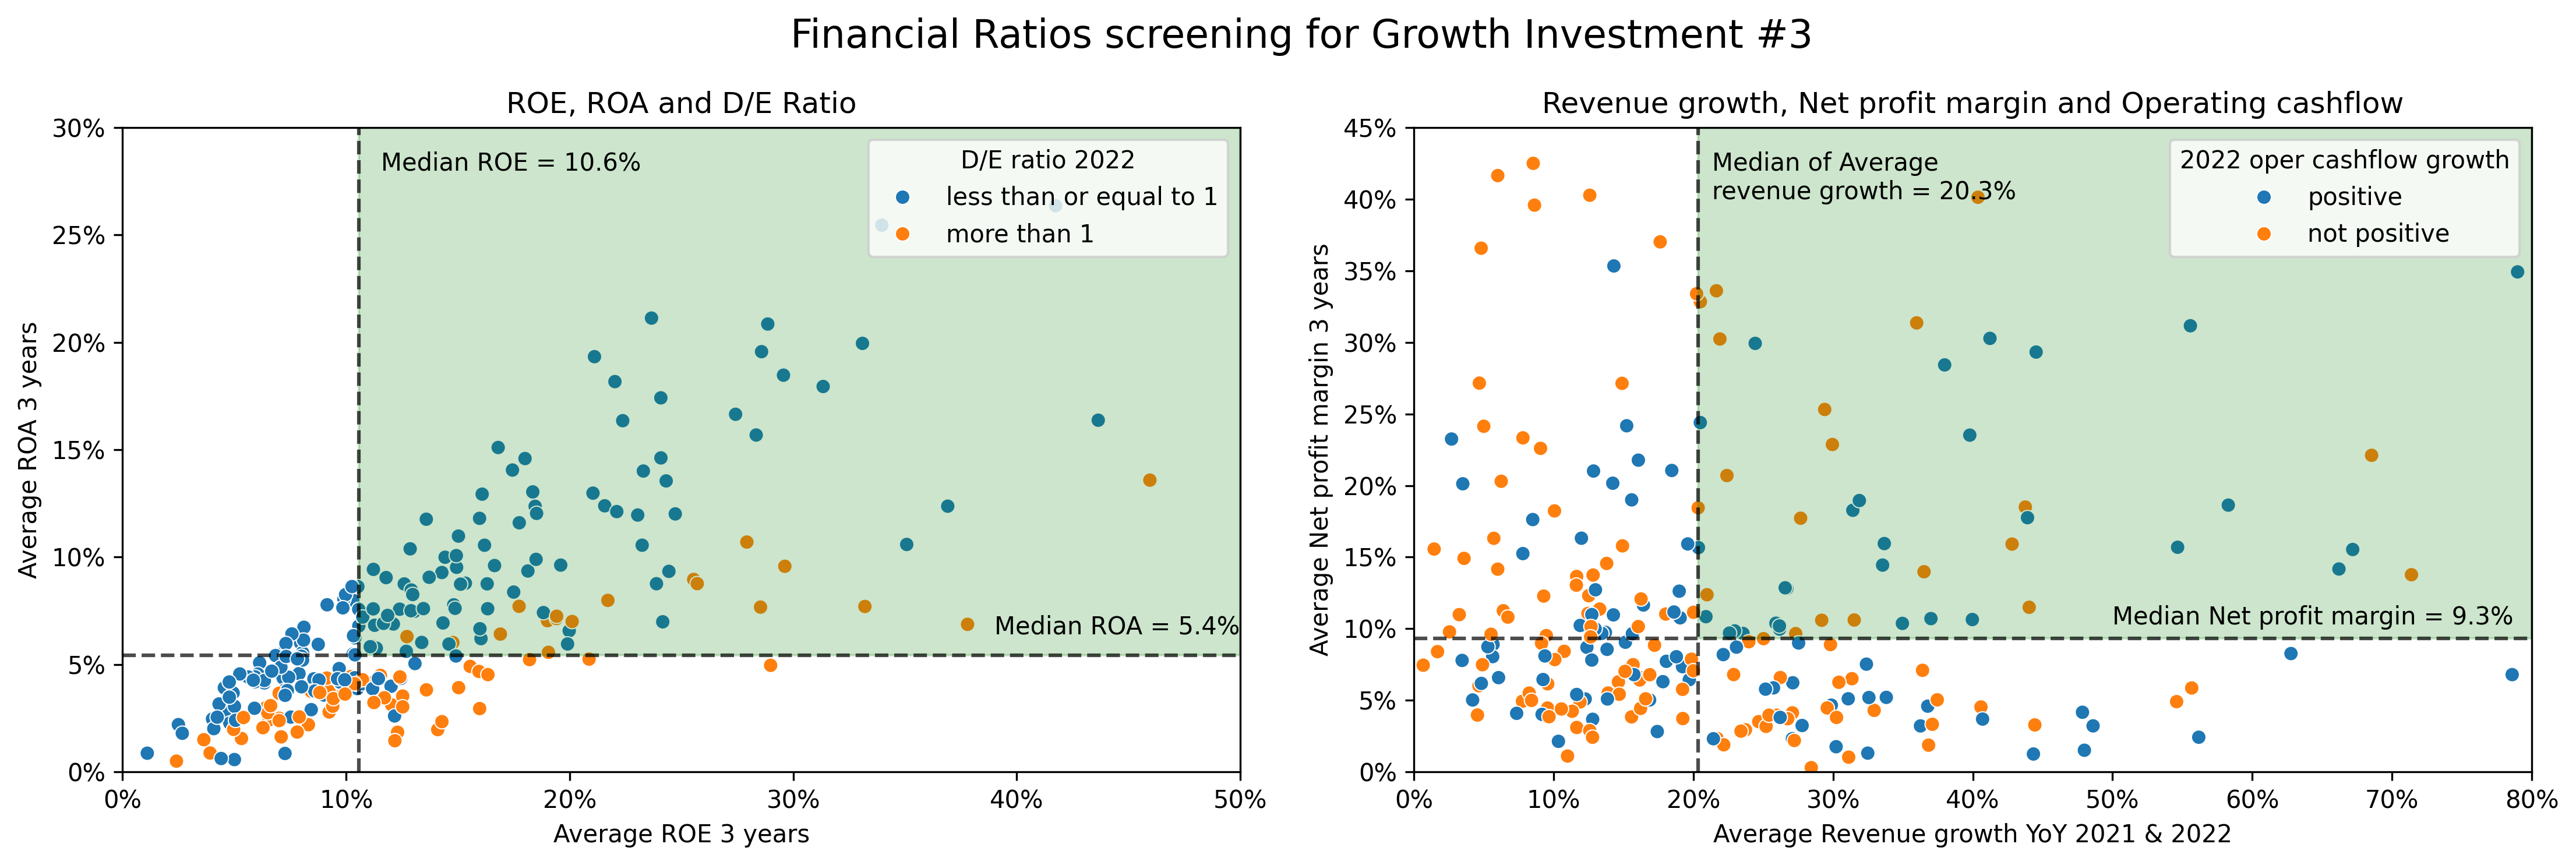

In [12]:
#combine all data
a = roe[['symbol', 'avg_roe_3year']].copy()
b = roa[['symbol','avg_roa_3year']].copy()
c = de[['symbol', '2022-12-31']].copy()
c = de[['symbol', '2022-12-31']].copy()
c['de2022'] = c['2022-12-31'].apply(lambda x: 'less than or equal to 1' if x <= 1 else 'more than 1')
c = c[['symbol', 'de2022']]
d = rev_gth[['symbol', 'rev_gth_2year']].copy()
e = npm[['symbol', 'avg_npm_3year']].copy()
###f = oper[['symbol', '2 years consecutive growth']].copy()
f = oper[['symbol', '2022 oper cashflow growth']].copy()

#combine a to f with inner join
df_merged = pd.merge(a, b, on='symbol', how='inner') \
             .merge(c, on='symbol', how='inner') \
             .merge(d, on='symbol', how='inner') \
             .merge(e, on='symbol', how='inner') \
             .merge(f, on='symbol', how='inner')

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#add first subplot
sns.scatterplot(x='avg_roe_3year', y='avg_roa_3year', hue='de2022', data=df_merged, ax=axes[0])

#adjust axis
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[0].set_xlim(0,0.5)
axes[0].set_ylim(0,0.3)
axes[0].set_xlabel('Average ROE 3 years')
axes[0].set_ylabel('Average ROA 3 years')
axes[0].set_title('ROE, ROA and D/E Ratio')
axes[0].axvline(x=median_roe, color='black', linestyle='--',alpha=0.7)
axes[0].axhline(y=median_roa, color='black', linestyle='--',alpha=0.7)
axes[0].legend(loc='upper right', title='D/E ratio 2022')
axes[0].text(median_roe + 0.01, 0.28, f'Median ROE = {median_roe*100:.1f}%', color='black')
axes[0].text(0.39, median_roa + 0.01, f'Median ROA = {median_roa*100:.1f}%', color='black')
axes[0].fill_betweenx(y=[median_roa, 0.3], x1=median_roe, x2=0.5, color='green', alpha=0.2)

#add second subplot
###sns.scatterplot(x='rev_gth_2year', y='avg_npm_3year', hue='2 years consecutive growth', data=df_merged, ax=axes[1])
sns.scatterplot(x='rev_gth_2year', y='avg_npm_3year', hue='2022 oper cashflow growth', data=df_merged, ax=axes[1])

#adjust axis
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
axes[1].set_xlim(0,0.8)
axes[1].set_ylim(0,0.45)
axes[1].set_xlabel('Average Revenue growth YoY 2021 & 2022')
axes[1].set_ylabel('Average Net profit margin 3 years')
axes[1].set_title('Revenue growth, Net profit margin and Operating cashflow')
axes[1].axvline(x=median_gth, color='black', linestyle='--',alpha=0.7)
axes[1].axhline(y=median_npm, color='black', linestyle='--',alpha=0.7)
###axes[1].legend(loc='upper right', title='2 years consecutive growth')
axes[1].legend(loc='upper right', title='2022 oper cashflow growth')
axes[1].text(median_gth + 0.01, 0.4, f'Median of Average\nrevenue growth = {median_gth*100:.1f}%', color='black')
axes[1].text(0.5, median_npm + 0.01, f'Median Net profit margin = {median_npm*100:.1f}%', color='black')
axes[1].fill_betweenx(y=[median_npm, 0.8], x1=median_gth, x2=0.8, color='green', alpha=0.2)

# Adjust the layout and display the plot
plt.suptitle('Financial Ratios screening for Growth Investment #3', fontsize=16)
plt.tight_layout()

### filter all criteria to get final list of stock

In [13]:
final_list = df_merged[(df_merged['avg_roe_3year']>= median_roe) &
              (df_merged['avg_roa_3year']>= median_roa) &
              (df_merged['de2022'] == 'less than or equal to 1') &
              (df_merged['rev_gth_2year']>= median_gth) &
              (df_merged['avg_npm_3year']>= median_npm) &
              ###(df_merged['2 years consecutive growth'] == 'positive')
              (df_merged['2022 oper cashflow growth'] == 'positive')
              ]

topten = final_list.sort_values(by='avg_npm_3year', ascending=False).head(10) #rank by highest avg_npm_3year

In [17]:
nat = topten.symbol.unique().tolist()
eix = ['METCO', 'KWC', 'UPF', 'TOPP', 'RCL', 'THIP', 'SPC','AYUD', 'SUC', 'TASCO'] #eix
champ = ['AMATA', 'JCT', 'RCL', 'SCCC', 'SPC', 'STA', 'SUC', 'TASCO', 'TCAP', 'TMD'] #champ
#champ2 = ['AMATA','B-WORK','JCT','METCO','PSH','PTTEP','RCL','SCCC','SPC','STA','SUC','TASCO','TCAP','THIP','TMD','TOPP','UPF']

### Function for plot return on investment and detail by symbol

In [15]:
#Function for visualize data
def get_return_on_investment(list_of_stock, money=1000000, start_date='2023-03-01', end_date='2024-10-01'):
  n = len(list_of_stock)
  buy = money/n
  port = pd.DataFrame()
  for stock in list_of_stock:
    symbol = stock+".BK"

    #calculate capital gain
    df = get_monthly_stock_prices(symbol, start_date, end_date)
    start_price = df.iloc[0].values[0]
    df['share'] = buy/start_price
    df['stock_values'] = df['Close']*df['share']

    #calculate dividend paid
    dvd = get_dividend_data(symbol, start_date, end_date)
    if dvd is None:
      m = df[['share', 'stock_values']].copy()
      m['dividend_pay_per_share'] = 0
      dvd = m
    else:
      dvd = dvd.pivot_table(index=dvd.index, values='amount', aggfunc='sum', fill_value=0)
      dvd.rename(columns={'amount': 'dividend_pay_per_share'}, inplace=True)

    #combine capital gain and dividend paid
    df = pd.merge(df, dvd[['dividend_pay_per_share']], on='Date', how='left')
    df['dividend_pay_per_share'] = df['dividend_pay_per_share'].fillna(0)
    df['dividend_paid'] = df['dividend_pay_per_share'] * df['share']
    df['accumulate_dividend'] = df['dividend_paid'].cumsum()
    df['total_values'] = df['stock_values'] + df['accumulate_dividend']

    #add to port
    port = pd.concat([port, df[['symbol','Close','share','stock_values','accumulate_dividend','total_values']]])

  return port

def calculate_return(port):
  df = port.reset_index().copy()
  df = df.melt(id_vars=['Date','symbol'], value_vars=['stock_values', 'accumulate_dividend']).set_index('Date')
  df.rename(columns={'variable': 'type of gain', 'value': 'THB'}, inplace=True)
  df.index = pd.to_datetime(df.index)
  return df

def format_y_axis_mil(y, pos):
    return f'{y/1000000:.2f}'

def format_y_axis_k(y, pos):
    return f'{y/1000:.0f}'

def plot_overall_return(port, name, money=1000000):
  fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

  #add first subplot > stock values
  df1 = port[port['type of gain'] == 'stock_values']
  sns.lineplot(x=df1.index, y='THB', data=df1, estimator='sum', errorbar=None, ax=axes[0], marker='.')
  axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts the ticks
  axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))  # Custom date format (Year-Month)

  # Rotate and adjust the x-tick labels
  # plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')
  axes[0].set_xlabel('')
  axes[0].set_ylabel('Million baht')
  axes[0].yaxis.set_major_formatter(FuncFormatter(format_y_axis_mil))

  #padding axis
  monthly_sum_df1 = df1.resample('ME').sum()
  current_min_mil = monthly_sum_df1['THB'].min()
  current_max_mil = monthly_sum_df1['THB'].max()
  axes[0].set_ylim(current_min_mil * 0.95, current_max_mil * 1.075)  # Add 10% padding

  # Annotate each point on the first subplot
  for line in axes[0].lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
      axes[0].annotate(f'{y_value/1000000:.2f}', (x_value, y_value),
                       textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
  # add title
  start = df1.loc[min(df1.index)]['THB'].sum()
  end = df1.loc[max(df1.index)]['THB'].sum()
  gain = end-start
  percent = (end-start)/start*100
  axes[0].set_title(f'Capital gain = {gain:,.0f} THB, %Capital gain = {percent:.1f}%')

  #add second subplot > dividend values
  df2 = port[port['type of gain'] == 'accumulate_dividend']
  sns.lineplot(x=df2.index, y='THB', data=df2, estimator='sum', errorbar=None, ax=axes[1])
  axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts the ticks
  axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))  # Custom date format (Year-Month)

  # Rotate and adjust the x-tick labels
  # plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')
  axes[1].set_xlabel('')
  axes[1].set_ylabel('Thousand baht')
  axes[1].yaxis.set_major_formatter(FuncFormatter(format_y_axis_k))

  #padding axis
  monthly_sum_df2 = df2.resample('ME').sum()
  current_min_k = monthly_sum_df2['THB'].min()
  current_max_k = monthly_sum_df2['THB'].max()
  axes[1].set_ylim(current_min_k * 0.95, current_max_k * 1.075)  # Add 10% padding

  # Annotate each point on the second subplot
  for line in axes[1].lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
      axes[1].annotate(f'{y_value/1000:.2f}', (x_value, y_value),
                       textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

  # add title
  dividend = df2.loc[max(df2.index)]['THB'].sum()
  dividend_yield = dividend/money
  axes[1].set_title(f'Accumulated dividend = {dividend:,.0f} THB, Total dividend yield = {dividend_yield*100:.1f}%')

  # Adjust layout and display
  tl = port.loc[max(port.index)]['THB'].sum()
  tl_gain = tl-money
  tl_roi = tl_gain/money*100
  plt.suptitle(f'Overall Return ({name}), Total return = {tl_gain:,.0f}, ROI = {tl_roi:.1f}%', fontsize=16)
  plt.tight_layout()

def plot_roi(list_of_stock, name, money=1000000, start_date='2023-03-01', end_date='2024-10-01'):
  port = get_return_on_investment(list_of_stock, money, start_date, end_date)
  x = calculate_return(port)
  plot_overall_return(x, name, money)

def display_overall_return_by_stock(x, name, money=1000000):
  df = x.pivot_table(index=[x.index,'symbol'], columns='type of gain', values='THB', aggfunc='sum').reset_index()
  df.set_index('Date', inplace=True)
  start = df.loc[df.index.min()].set_index('symbol')
  end = df.loc[df.index.max()].set_index('symbol')

  #merge start and end
  merged_df = start.merge(end, on='symbol', suffixes=('_start', '_end'))
  merged_df['capital gain'] = merged_df['stock_values_end'] - merged_df['stock_values_start']
  merged_df['%capital gain'] = merged_df['capital gain'] / merged_df['stock_values_start']
  merged_df['%accumulated dividend yield'] = merged_df['accumulate_dividend_end'] / merged_df['stock_values_start']
  merged_df['total return'] = merged_df['capital gain'] + merged_df['accumulate_dividend_end']
  merged_df['ROI'] = merged_df['total return'] / merged_df['stock_values_start']
  merged_df.rename(columns={'stock_values_start':'initial portfolio', 'stock_values_end':'current portfolio', 'accumulate_dividend_end':'accumulated dividend'}, inplace=True)
  rt = merged_df[['initial portfolio', 'current portfolio', 'capital gain', '%capital gain','accumulated dividend', '%accumulated dividend yield', 'total return', 'ROI']]

  # Ensure the index is datetime
  df.index = pd.to_datetime(df.index)

  # Format the start and end dates
  start_date = df.index.min().strftime('%b %Y')  # e.g., Mar 2023
  end_date = df.index.max().strftime('%b %Y')  # e.g., Sep 2024

  # Calculate the difference in years and months
  date_diff = relativedelta(df.index.max(), df.index.min())
  years = date_diff.years
  months = date_diff.months

  # Construct the output
  print(f'Summary of investment by symbol ({name})')
  print(f'start invest from {start_date} to {end_date} (total time: {years} year {months} months)')
  rt.columns.name = None
  rt = rt.sort_values(by='ROI', ascending=False)

  # Applying the formatting
  df_style = (rt.style
      .format({
          'initial portfolio': '{:,.0f}',
          'current portfolio': '{:,.0f}',
          'capital gain': '{:,.0f}',
          '%capital gain': '{:.1%}',
          'accumulated dividend': '{:,.0f}',
          '%accumulated dividend yield': '{:.1%}',
          'total return': '{:,.0f}',
          'ROI': '{:.1%}'
      })
              )

  display(df_style)

def display_summary(list_of_stock, name, money = 1000000):
  port = get_return_on_investment(list_of_stock)
  x = calculate_return(port)
  display_overall_return_by_stock(x, name, money)

### Plot return on investment

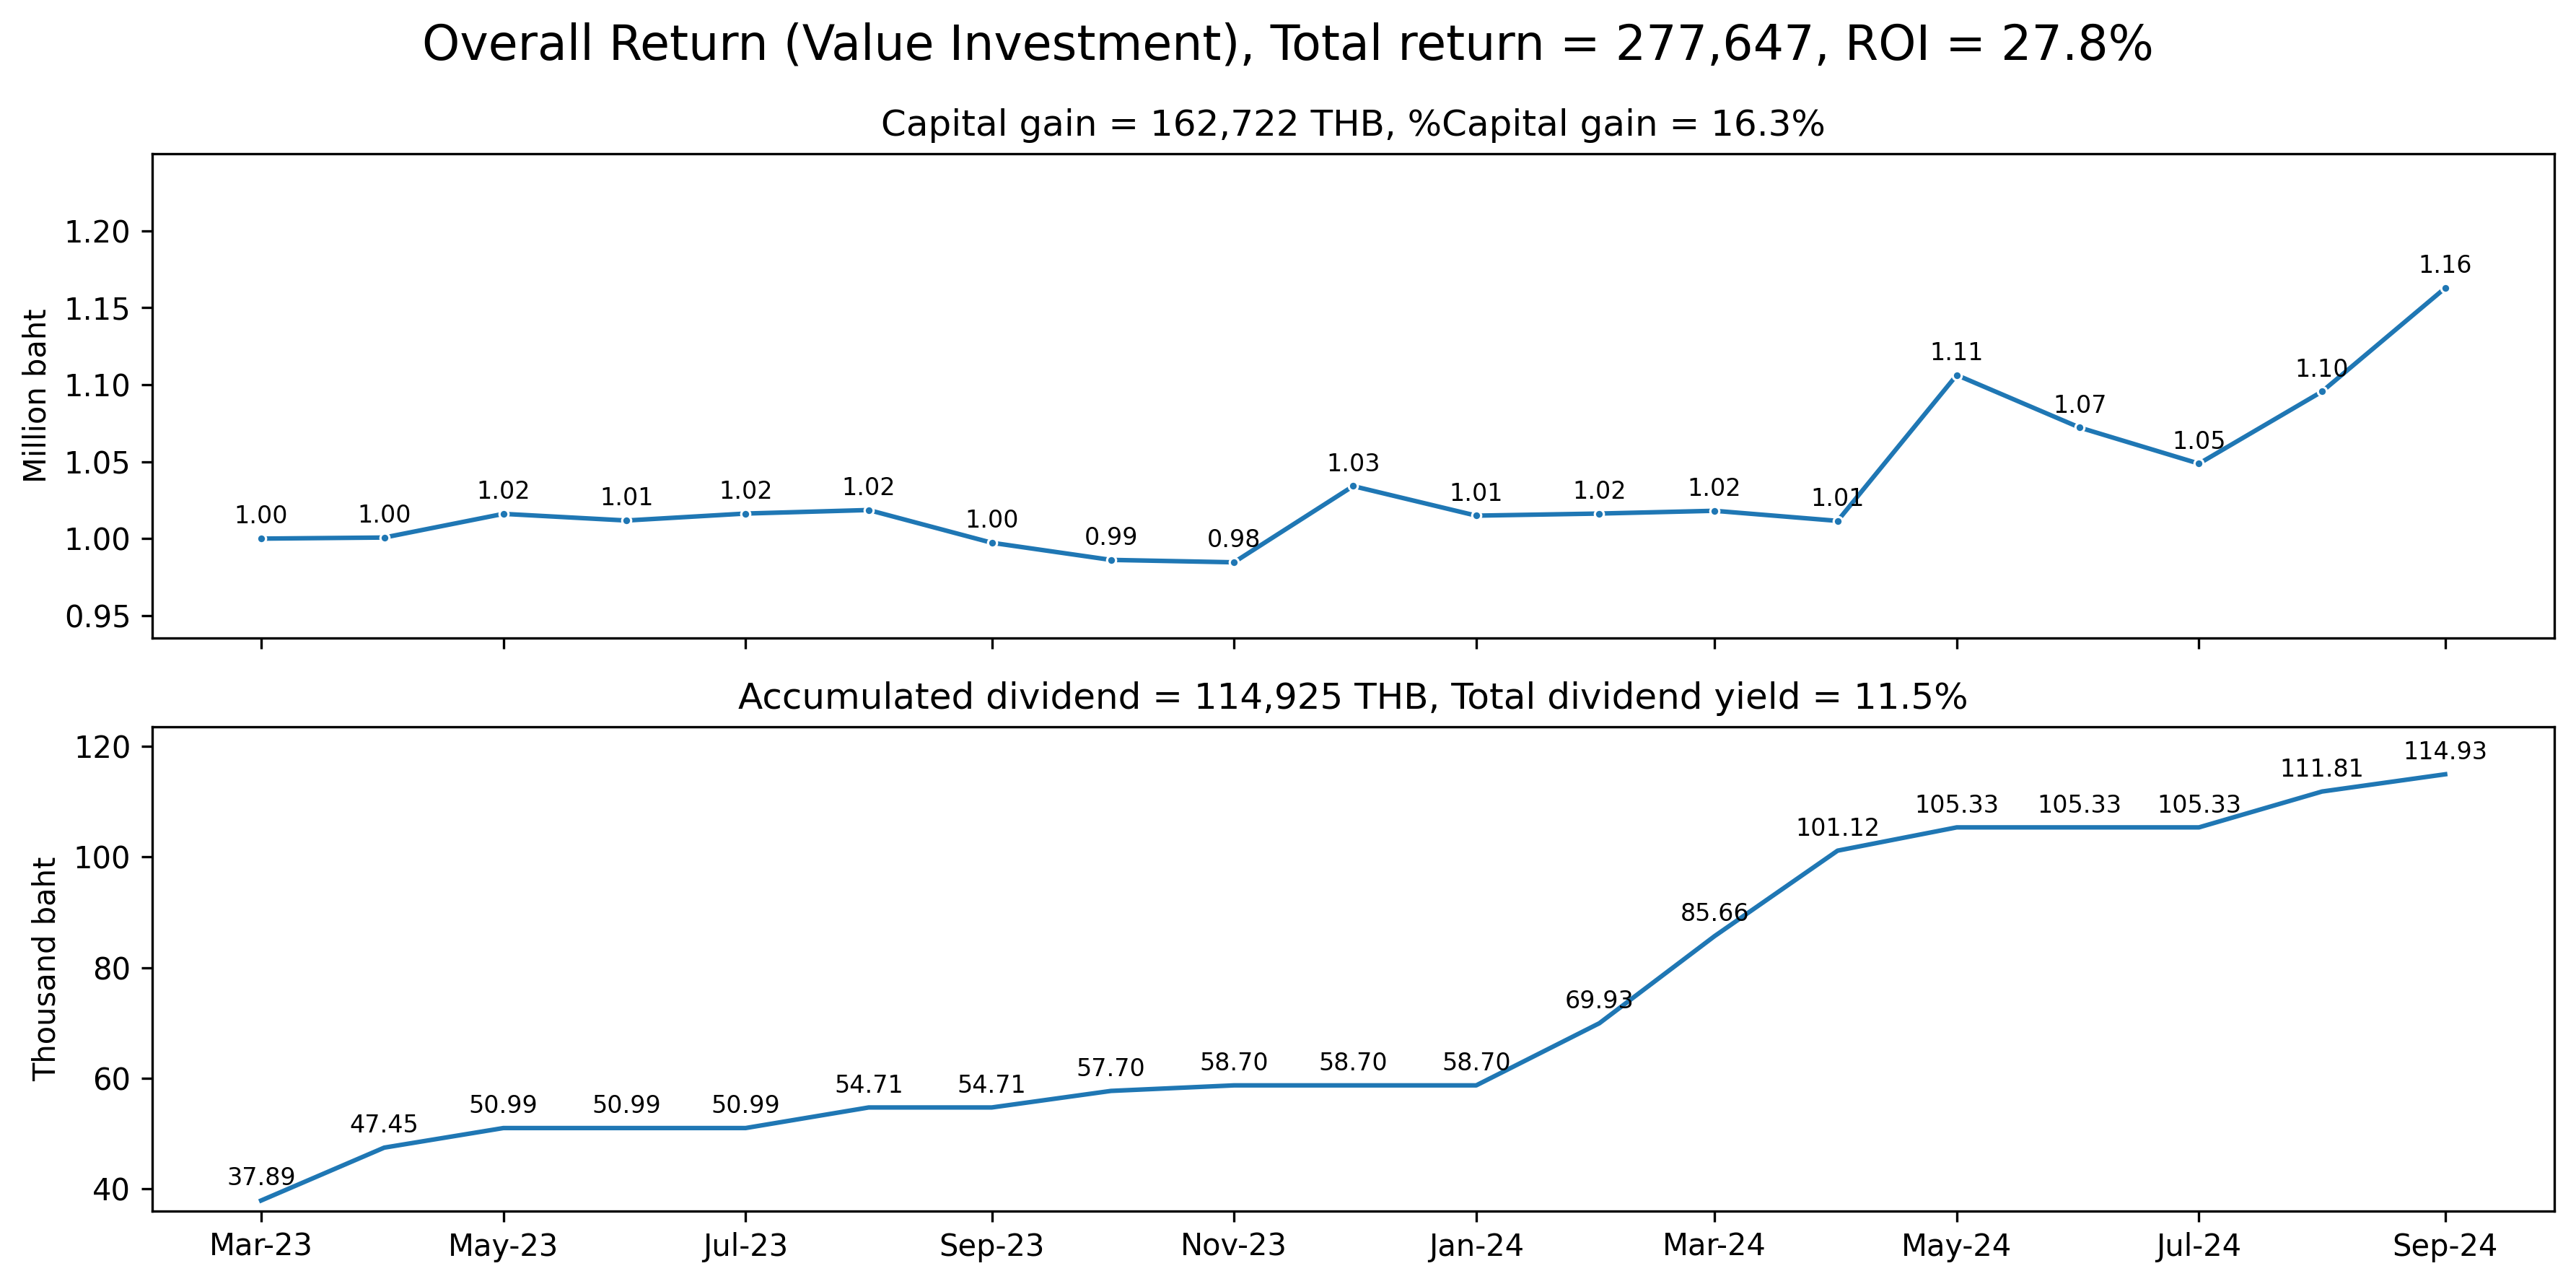

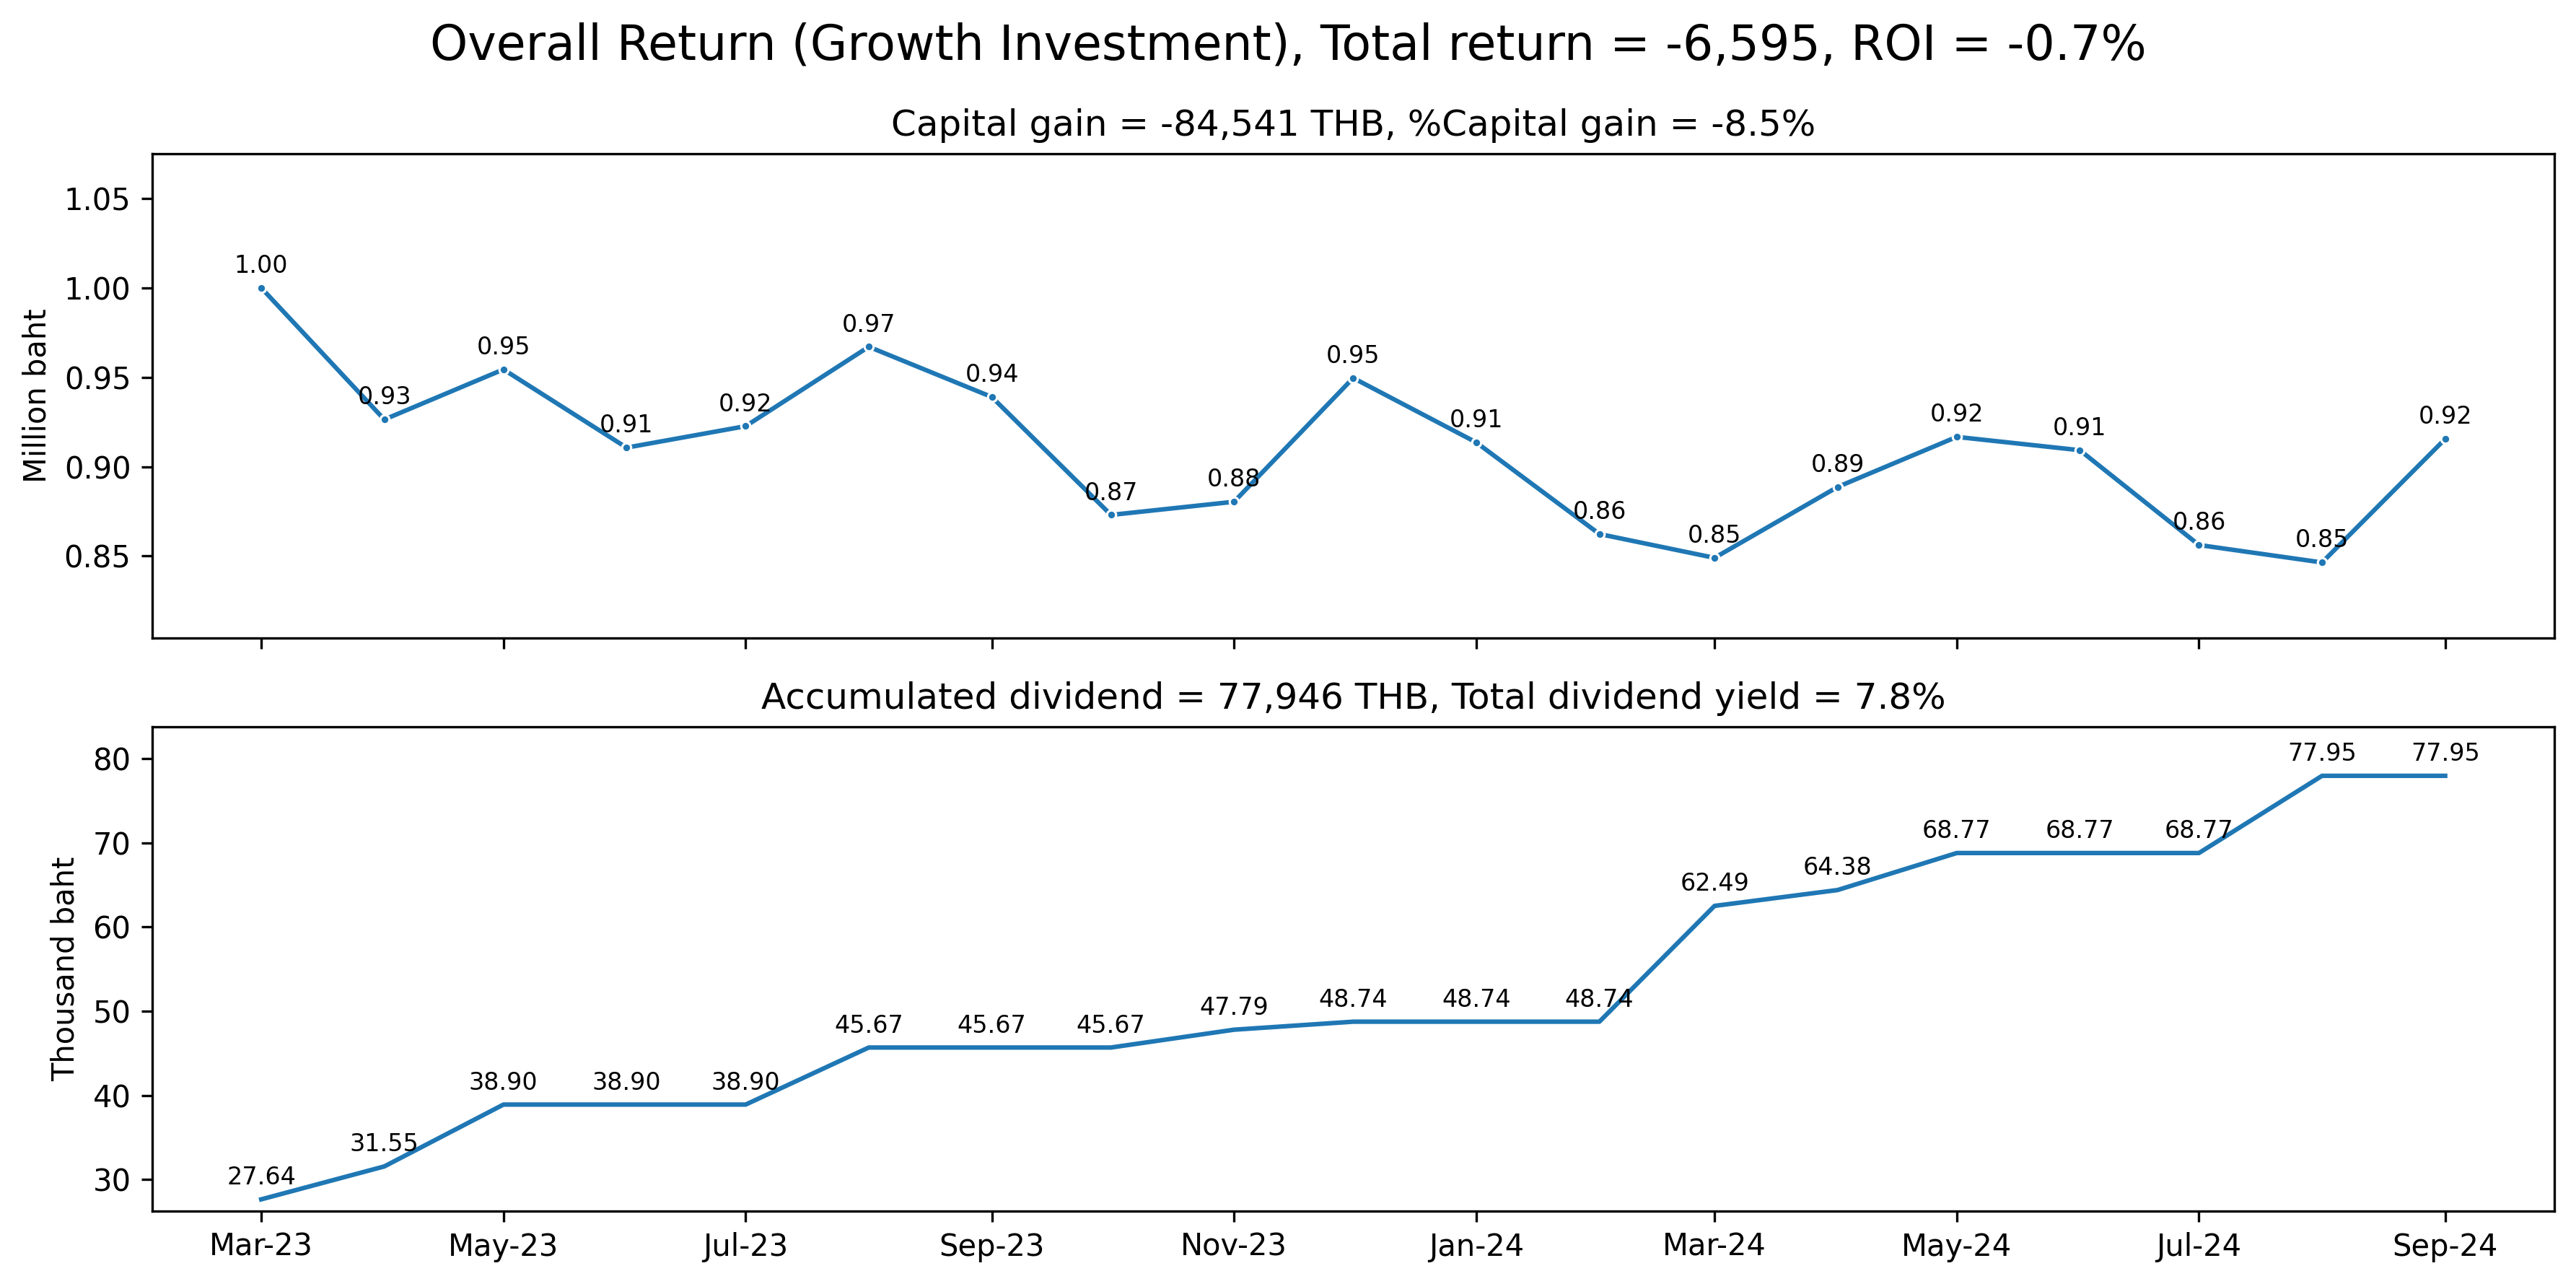

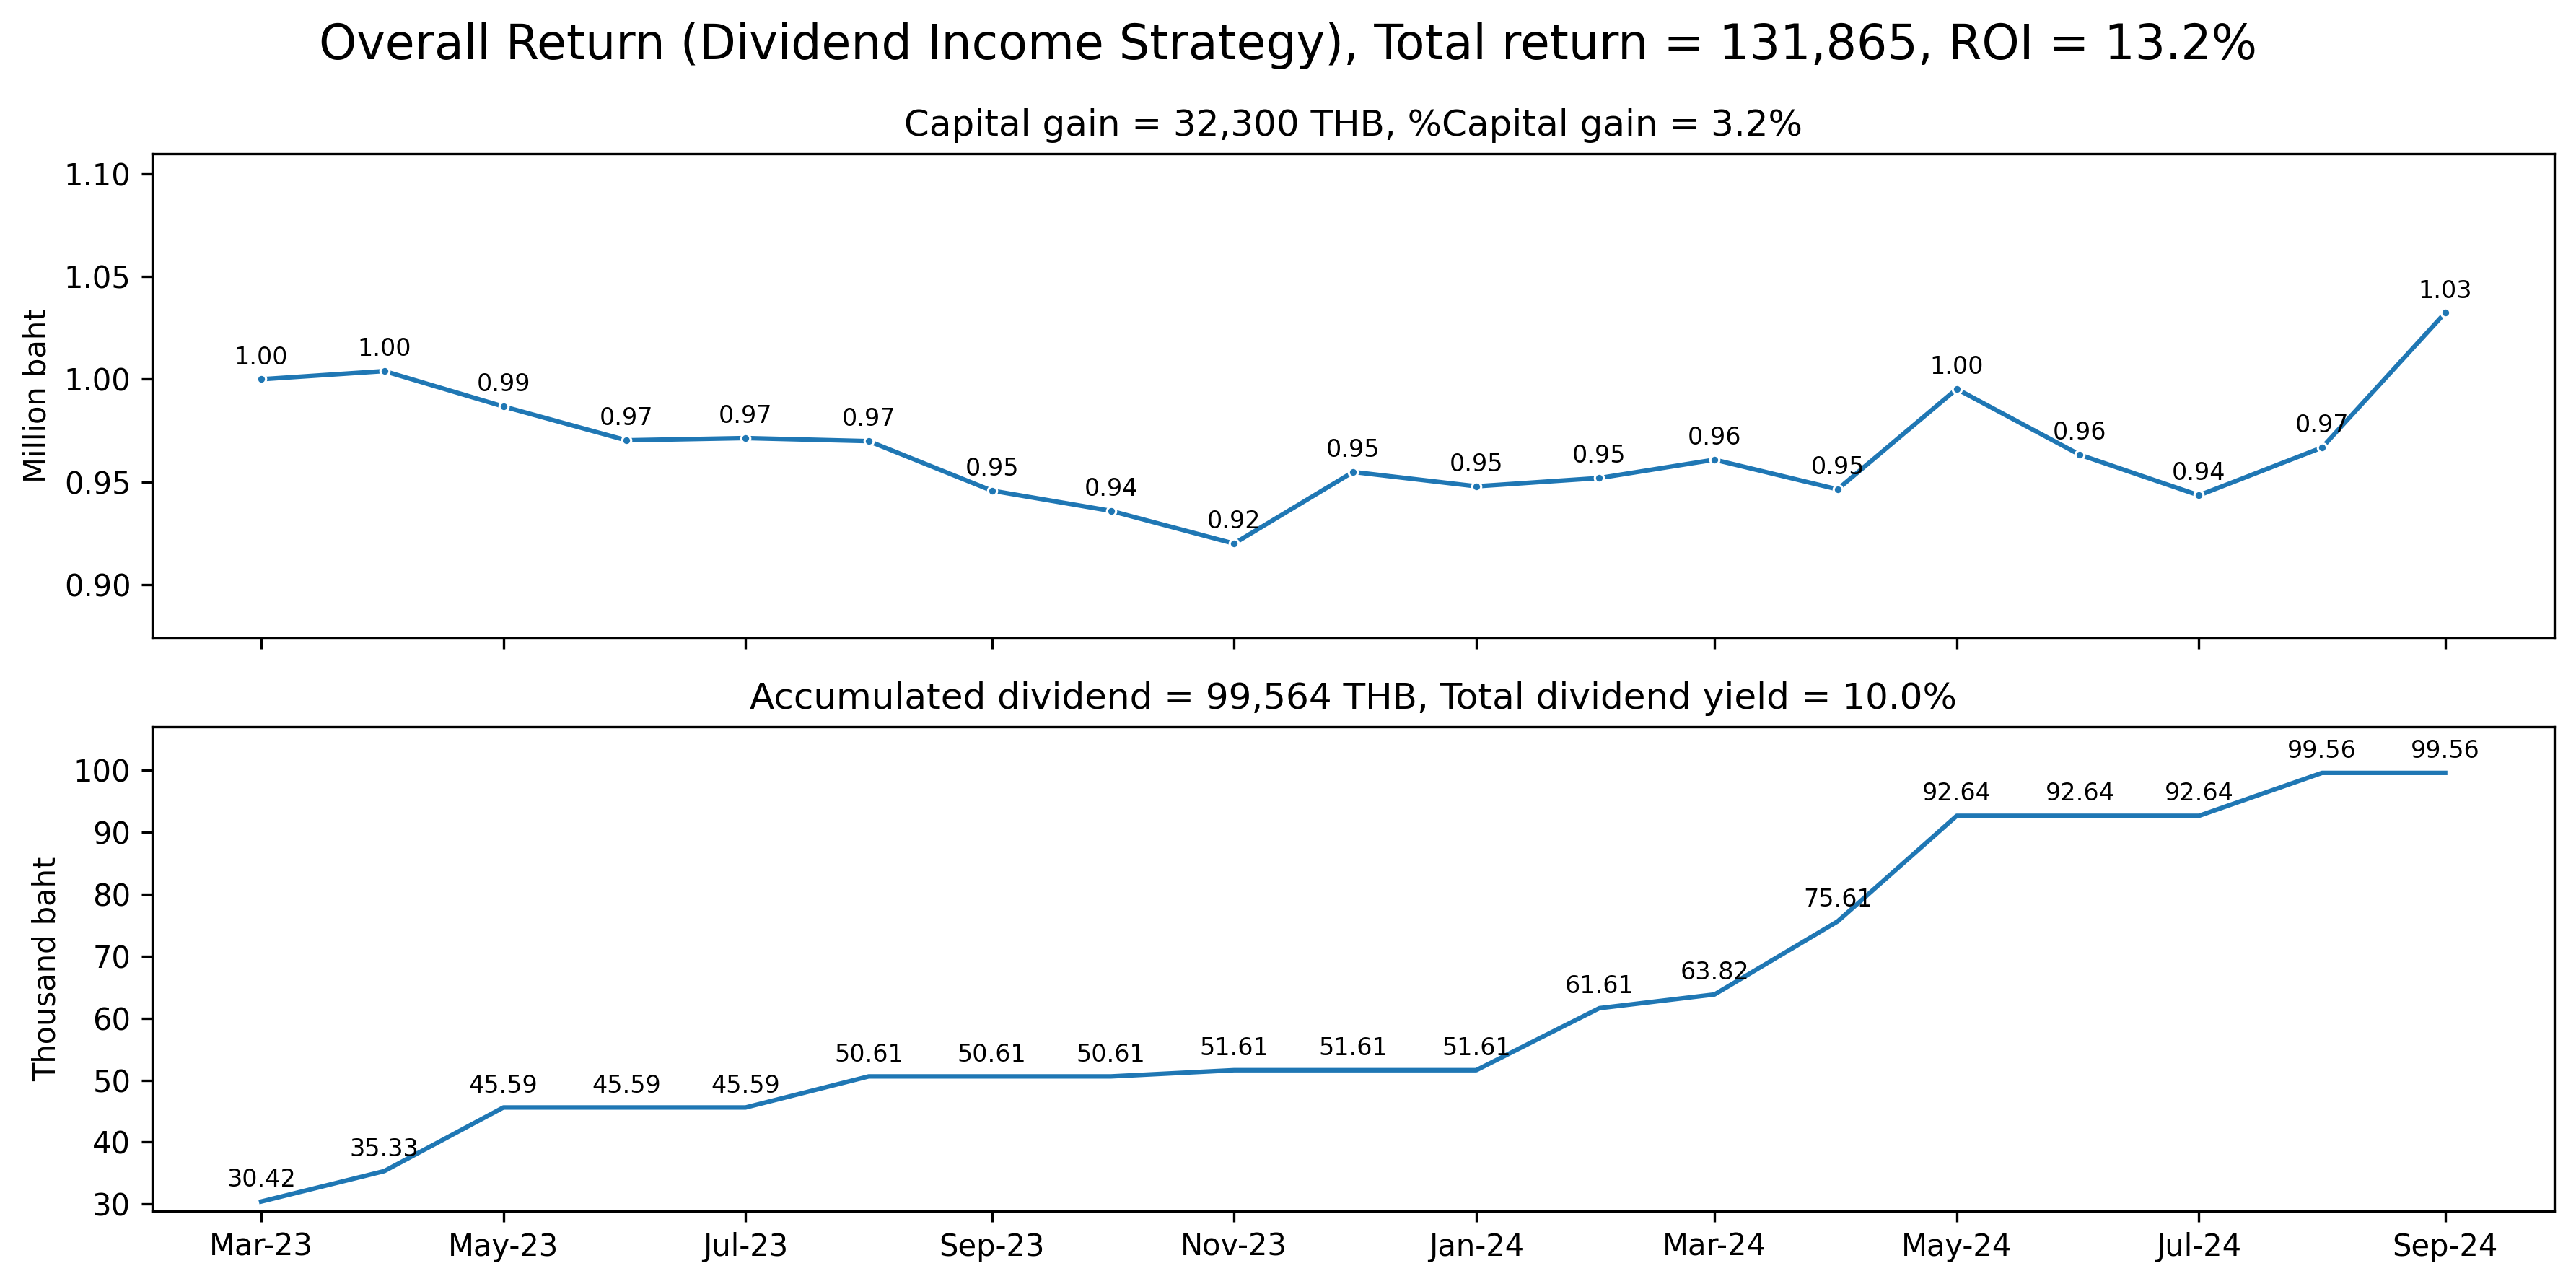

In [19]:
plot_roi(list_of_stock=champ, name='Value Investment', money=1000000, start_date='2023-03-01', end_date='2024-10-01')
plot_roi(list_of_stock=nat, name='Growth Investment', money=1000000, start_date='2023-03-01', end_date='2024-10-01')
plot_roi(list_of_stock=eix, name='Dividend Income Strategy', money=1000000, start_date='2023-03-01', end_date='2024-10-01')

### Display summary by symbol sort by %ROI

In [22]:
display_summary(list_of_stock=champ, name="Value Investment", money = 1000000)
display_summary(list_of_stock=nat, name="Growth Investment", money = 1000000)
display_summary(list_of_stock=eix, name="Dividend Income Strategy", money = 1000000)

Summary of investment by symbol (Value Investment)
start invest from Mar 2023 to Sep 2024 (total time: 1 year 6 months)


,initial portfolio,current portfolio,capital gain,%capital gain,accumulated dividend,%accumulated dividend yield,total return,ROI
symbol,,,,,,,,
TCAP,"100,000","122,873","22,873",22.9%,"15,822",15.8%,"38,695",38.7%
RCL,"100,000","119,387","19,387",19.4%,"18,792",18.8%,"38,180",38.2%
SUC,"100,000","123,398","23,398",23.4%,"11,304",11.3%,"34,702",34.7%
SCCC,"100,000","123,758","23,758",23.8%,"8,535",8.5%,"32,293",32.3%
TMD,"100,000","116,365","16,365",16.4%,"15,199",15.2%,"31,563",31.6%
STA,"100,000","120,568","20,568",20.6%,"9,645",9.6%,"30,214",30.2%
JCT,"100,000","112,251","12,251",12.3%,"11,504",11.5%,"23,755",23.8%
AMATA,"100,000","116,672","16,672",16.7%,"6,067",6.1%,"22,739",22.7%
TASCO,"100,000","108,387","8,387",8.4%,"13,041",13.0%,"21,428",21.4%


Summary of investment by symbol (Growth Investment)
start invest from Mar 2023 to Sep 2024 (total time: 1 year 6 months)


,initial portfolio,current portfolio,capital gain,%capital gain,accumulated dividend,%accumulated dividend yield,total return,ROI
symbol,,,,,,,,
RCL,"100,000","119,387","19,387",19.4%,"18,792",18.8%,"38,180",38.2%
UPOIC,"100,000","118,451","18,451",18.5%,"13,460",13.5%,"31,911",31.9%
AAI,"100,000","116,361","16,361",16.4%,"11,900",11.9%,"28,261",28.3%
BH,"100,000","123,660","23,660",23.7%,"4,068",4.1%,"27,729",27.7%
RJH,"100,000","88,303","-11,697",-11.7%,"9,515",9.5%,"-2,182",-2.2%
KCE,"100,000","90,970","-9,030",-9.0%,"5,869",5.9%,"-3,161",-3.2%
MEB,"100,000","88,395","-11,605",-11.6%,"2,029",2.0%,"-9,577",-9.6%
SMD,"100,000","62,932","-37,068",-37.1%,"11,288",11.3%,"-25,780",-25.8%
SICT,"100,000","68,207","-31,793",-31.8%,568,0.6%,"-31,225",-31.2%


Summary of investment by symbol (Dividend Income Strategy)
start invest from Mar 2023 to Sep 2024 (total time: 1 year 6 months)


,initial portfolio,current portfolio,capital gain,%capital gain,accumulated dividend,%accumulated dividend yield,total return,ROI
symbol,,,,,,,,
KWC,"100,000","131,518","31,518",31.5%,"8,614",8.6%,"40,132",40.1%
RCL,"100,000","119,387","19,387",19.4%,"18,792",18.8%,"38,180",38.2%
SUC,"100,000","123,398","23,398",23.4%,"11,304",11.3%,"34,702",34.7%
TASCO,"100,000","108,387","8,387",8.4%,"13,041",13.0%,"21,428",21.4%
TOPP,"100,000","108,800","8,800",8.8%,"6,924",6.9%,"15,724",15.7%
THIP,"100,000","101,476","1,476",1.5%,"14,050",14.1%,"15,526",15.5%
SPC,"100,000","99,063",-937,-0.9%,"5,016",5.0%,"4,079",4.1%
AYUD,"100,000","88,100","-11,900",-11.9%,"10,190",10.2%,"-1,711",-1.7%
METCO,"100,000","81,598","-18,402",-18.4%,"4,206",4.2%,"-14,196",-14.2%
